<a href="https://colab.research.google.com/github/Chichi213/Daiz_CPE-313/blob/main/Daiz_Hands_on_Activity_1_3_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

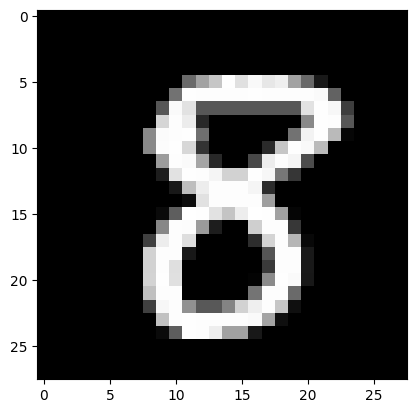

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 64)                50240     
                                                                 
 dropout_99 (Dropout)        (None, 64)                0         
                                                                 
 dense_146 (Dense)           (None, 64)                4160      
                                                                 
 dropout_100 (Dropout)       (None, 64)                0         
                                                                 
 dense_147 (Dense)           (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5074 - accuracy: 0.8461 - val_loss: 0.2091 - val_accuracy: 0.9382
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2540 - accuracy: 0.9248 - val_loss: 0.1668 - val_accuracy: 0.9477
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2072 - accuracy: 0.9381 - val_loss: 0.1319 - val_accuracy: 0.9601
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1785 - accuracy: 0.9464 - val_loss: 0.1180 - val_accuracy: 0.9637
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1584 - accuracy: 0.9534 - val_loss: 0.1149 - val_accuracy: 0.9652
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1451 - accuracy: 0.9567 - val_loss: 0.1110 - val_accuracy: 0.9662
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1363 - accuracy: 0.9596 - val_loss: 0.1027 - val_accuracy: 0.9705
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10526300221681595
Test accuracy: 0.9764999747276306


Interpret the result

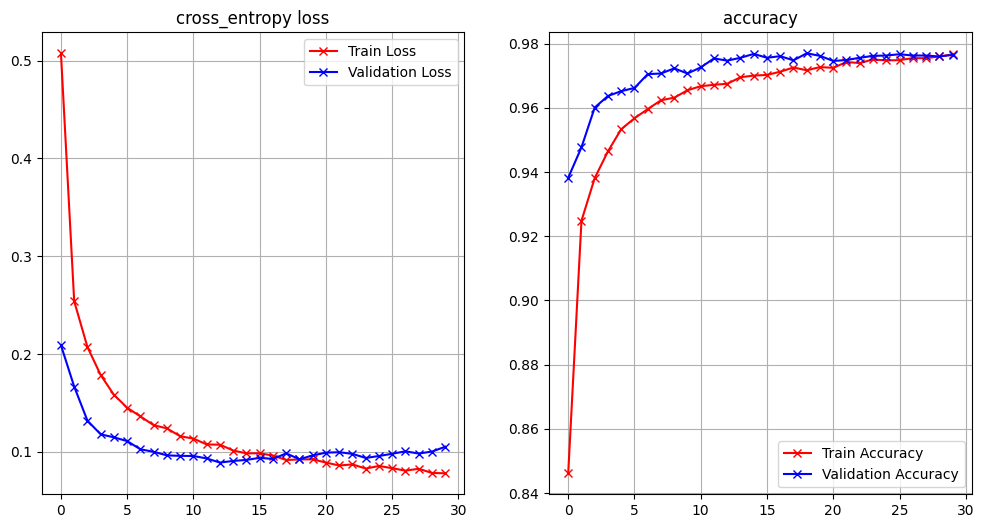

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

On the left side of the graph, we see that the training loss gradually decreases, but the validation loss increases. On the right side, as the epochs increase, both training and validation accuracy improve. Overall, the validation loss is much higher than the training loss, indicating overfitting as epochs increase. However, the accuracy is good, reaching 97% during training the data.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
# Creating Nueral Network for model 1.
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(784,)))
model.add(Dropout(0.4))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='sigmoid'))

In [ ]:
#Summary of Nueral network and total number of Parameter
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 400)               314000    
                                                                 
 dropout_101 (Dropout)       (None, 400)               0         
                                                                 
 dense_149 (Dense)           (None, 300)               120300    
                                                                 
 dropout_102 (Dropout)       (None, 300)               0         
                                                                 
 dense_150 (Dense)           (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3347 - accuracy: 0.8982 - val_loss: 0.1292 - val_accuracy: 0.9600
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1534 - accuracy: 0.9542 - val_loss: 0.1018 - val_accuracy: 0.9688
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1175 - accuracy: 0.9645 - val_loss: 0.0856 - val_accuracy: 0.9742
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0970 - accuracy: 0.9713 - val_loss: 0.0723 - val_accuracy: 0.9793
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0859 - accuracy: 0.9743 - val_loss: 0.0739 - val_accuracy: 0.9796
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0773 - accuracy: 0.9767 - val_loss: 0.0725 - val_accuracy: 0.9794
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0727 - accuracy: 0.9787 - val_loss: 0.0736 - val_accuracy: 0.9800

In [ ]:
#getting the Test loss and its accuracy for model 1.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07160903513431549
Test accuracy: 0.9851999878883362


4. How many parameters does your model have? How does it compare with the previous model?
- Between the procedure and supplementary activity they have both nueral networks with 2 hidden and 1 output layers but in supplementary I used different activiation function like sigmoid. As a result the test loss and accuracy of supplementary is much better than the procedure.

In [ ]:
#Creating Neural network for model 2.
from keras import regularizers

model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01), activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10,activation='sigmoid'))

In [ ]:
from keras.callbacks import EarlyStopping
#Early Stop Regularizer
earlystop= EarlyStopping(monitor='val_accuracy', patience=10)
learning_rate = .1
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 100
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[earlystop])

Epoch 1/100
469/469 [==============================] - 10s 19ms/step - loss: 0.9946 - accuracy: 0.8966 - val_loss: 0.4026 - val_accuracy: 0.9524
Epoch 2/100
469/469 [==============================] - 6s 14ms/step - loss: 0.3839 - accuracy: 0.9496 - val_loss: 0.3067 - val_accuracy: 0.9613
Epoch 3/100
469/469 [==============================] - 7s 16ms/step - loss: 0.3062 - accuracy: 0.9599 - val_loss: 0.2503 - val_accuracy: 0.9682
Epoch 4/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2702 - accuracy: 0.9638 - val_loss: 0.2179 - val_accuracy: 0.9733
Epoch 5/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2428 - accuracy: 0.9683 - val_loss: 0.2071 - val_accuracy: 0.9731
Epoch 6/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2238 - accuracy: 0.9714 - val_loss: 0.1996 - val_accuracy: 0.9725
Epoch 7/100
469/469 [==============================] - 6s 14ms/step - loss: 0.2118 - accuracy: 0.9726 - val_loss: 0.1874 - val_accuracy

In [ ]:
#getting the Test loss and its accuracy for model 2
score2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.12004483491182327
Test accuracy: 0.9818000197410583


Even though I add some regularizer like the earlystop,l1 and l2 to optimized the model 2 it still losses to model 1, becuase the accuracy and test loss of model 1 is still much better than model 2.

#### Conclusion

We're learning about regularization techniques in neural networks. We use methods like early stopping, dropout, L1, and L2 regularization to prevent overfitting and underfitting when training our data for many epochs. These techniques help us manage large datasets effectively, ensuring our model learns well without getting too biased towards the training data.